In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
sympy.init_printing()

%matplotlib inline

# Kernel Spaces

This notebook follows and illustrates roughly the chapter 5 of the book "Elements of Statistical Learning". My goal is to understand how Kernels can be seen as the prior covariance of a zero mean Gaussian process, and how their eigenfunctions look like.

## Polynomial Kernel Regression

We build a 1D dataset with some light polynomial non-linearities

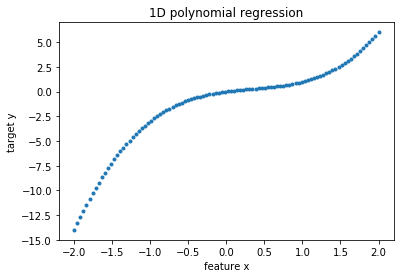

In [27]:
n_features = 1
n_samples = 100

# x = np.random.normal(loc=0, scale=1, size=n_samples)
x = np.linspace(-2, 2, n_samples)
y = x - x**2 + x**3

fig, ax = plt.subplots()
ax.plot(x, y, '.')
ax.set(xlabel='feature x', ylabel='target y', title='1D polynomial regression');

Let us first consider the so-called polynomial kernel $K(x, y) = (<x, y> + 1)^3$, as in chapter 5.82. Expanded, this Kernel is:

In [28]:
x1, y1 = sympy.symbols('x_1 y_1')
kernel_expr = (x1 * y1 + 1)**3
kernel_expr.expand()

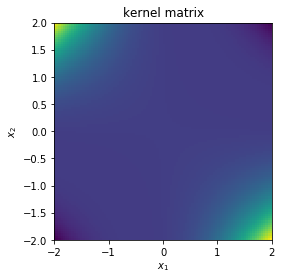

In [48]:
kernel_matrix = (x[:, None] * x[None, :] + 1)**3

fig, ax = plt.subplots()
ax.imshow(kernel_matrix, extent=(x[0], x[-1], x[0], x[-1]));
ax.set(title='kernel matrix', xlabel='$x_1$', ylabel='$x_2$');

the Kernel matrix describes the relation between two sample points $x_1$ and $x_2$. It can be seen as something like a covariance matrix, where the covariance is given by the kernel $K(x_1, x_2)$. The covariance matrix is banded but non-stationary: points around $x=0$ are less similar, than points around $x=\pm 2$. If the covariance matrix was stationary, i.e. the covariance is a function of sample distance alone, it's eigenvectors would resemble the Fourier basis.

We now compute the eigenvectors of this matrix to determine its' effective rank:

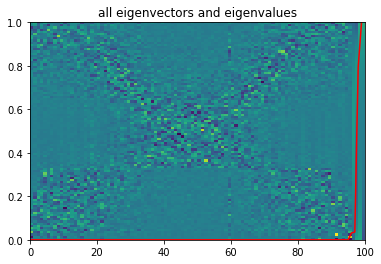

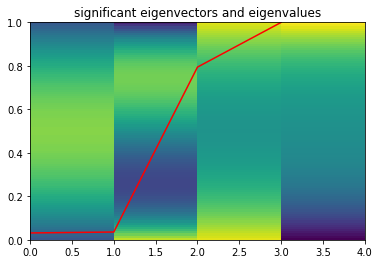

In [49]:
evals, evecs = np.linalg.eigh(kernel_matrix)

fig, ax = plt.subplots()
ax.imshow(evecs, aspect='auto', origin='lower', extent=(0, len(evals), 0, 1));
ax.plot(evals / evals.max(), c='red')
ax.set(title='all eigenvectors and eigenvalues')

evals_significant = evals > evals.max() * 1e-3
fig, ax = plt.subplots()
ax.imshow(evecs[:, evals_significant], aspect='auto', origin='lower',
          extent=(0, np.sum(evals_significant), 0, 1));
ax.plot(evals[evals_significant] / evals[evals_significant].max(), c='red');
ax.set(title='significant eigenvectors and eigenvalues')

We can see that the kernel matrix has only 4 eigenvalue eigenvector pairs with significant energy. We would like to penalize all *other* eigenfunctions in the expansion and retain the ones that are significant for K. This can be expressed using the following norm on functions f:
\begin{align}
    ||f||^2_{HK} &= \sum_i c^2_i / \gamma_i
\end{align}

The eigenvectors that we retain and that are penalized are a-priori information that comes from the covariance-like matrix induced by K. We penalize functions that don't have the right covariance. Comparing with the kernel covariance matrix, this implies, that we favour for example functions with:

\begin{align}
    f(x_1) \times f(x_2) > 0 \quad (\textrm{for}~x_1 \approx x_2 >> 0)\\
    f(x_1) \times f(x_2) < 0 \quad (\textrm{for}~x_1 \approx -x_2 << 0)
\end{align}

The function itself depends on the actual values y.